<a href="https://colab.research.google.com/github/youngjinjae/pythontest/blob/main/0725_logisticRegression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

admit    0
gre      0
gpa      0
rank     0
dtype: int64


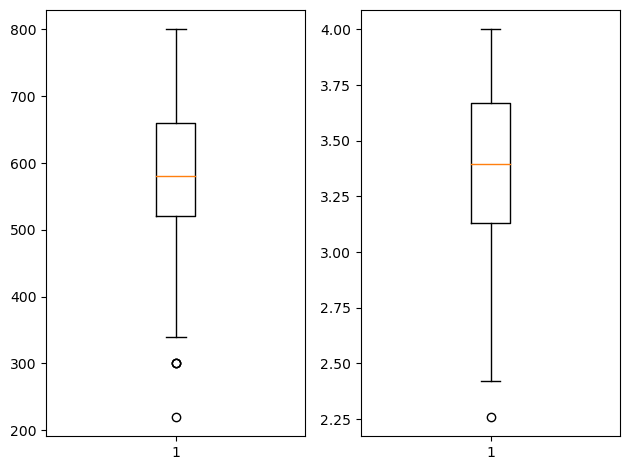

In [ ]:
# 대학원 합격 여부에 관한 데이터 가지고 오기
# LogisticRegression 을 구현
# 정규화 필요하다. 최대 최소 핸들링

import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler # 정규화 필요 최대최소 격차커서

from sklearn import linear_model
import matplotlib.pyplot as plt

#rawdata loading
df = pd.read_csv('./data/admission/admission.csv')
# display(df)

#1. 결측치 처리 <pandas 사용화면 결치값 확인 가능>
print(df.isnull().sum(axis=0)) #nan 갯구 확인하려고 열로 전부 false nan 값없다

#2. 이상치 처리
# 이상한 값 찾아야한다. => outlier를 찾아야한다. 삭제 수정
# 어떻게 찾나요? 이상치가 있는지 어떻게 확인하나요?
# 이상치 확인에 가장 간단한 방법 중 하나는 boxplot를 이용하는거

fig = plt.figure() # 도화지
fig_gre = fig.add_subplot(1,2,1) #1행 2열
fig_gpa = fig.add_subplot(1,2,2) #1행 2열

fig_gre.boxplot(df['gre'])
fig_gpa.boxplot(df['gpa']) # boxplot 그림 그린다.


fig.tight_layout()
plt.show() # 네모난 상자 두개 밑에 0이 있다.

# 이상치가 있다. 너무 낮은 점수
# 이상치를 처리 하거나 포함하거나
# z-score 방식이나 turkey fence 방식 처리





In [ ]:
# 3. 정규화는 꼭 해야합니다.
# 데이터부터 나누고 정규화를 진행

# traing data set # 데이터프레임 2차원 으로
x_data = df[['gre','gpa','rank']].values #독립변수 3개 늘어남 아까 regression 독립변수3개 !!
t_data = df['admit'].values.reshape(-1,1) # 시리즈로 나오니 2차원으로

scaler = MinMaxScaler()
scaler.fit(x_data) #gre, gpa 두개의 정규화 담은 fit
x_data_norm = scaler.transform(x_data) # 데이터 정규화 시켜라~

# print(x_data_norm)



In [ ]:
# sklearn 구현

sklearn_model = linear_model.LogisticRegression() # linear 아닌 logist 만들어짐

# 모델 학습
sklearn_model.fit(x_data, t_data.ravel()) # sklearn 알아서 데이터 정규화 시킴
                             #ravel 1차워으로 ravel 안붙히면 2차원으로 판단 오류

# # 예측을 수행해보라
# sklearn_predict = sklearn_model.predict([[600, 3.8 ,1]])
# #gre: 600 gpa: 3.8 , 1로 합격여부 확인

# sklearn_predict_predict_proba = sklearn_model.predict_proba([[600, 3.8, 1]])
# # 확률를 뽑아줘

# print(sklearn_predict) # 0 불합격 실제로 계산된 확률 몰름

# print(sklearn_predict_predict_proba) # 그래서 proba 확률어느정도인지 보여줌
# 예측을 수행해 보아요!

sklearn_predict = sklearn_model.predict([[600, 3.8, 1]])
# GRE : 600, GPA : 3.8, Rank : 1
sklearn_predict_proba = sklearn_model.predict_proba([[600, 3.8, 1]])

print(sklearn_predict)  # [1] 합격
print(sklearn_predict_proba)  # [[0.4308339 0.5691661]]

[1]
[[0.4308339 0.5691661]]


In [ ]:
# 이걸 tensorflow로 구현

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam, SGD

# keras_model = Sequential()
# keras_model.add(Flatten(input_shape=(3,)))
# keras_model.add(Dense(1,activation='sigmoid'))

# keras_model.compile(optimizer=Adam(learning_rate=1e-2),  # 수행  2 => 4로 변경 68%
#                     loss='binary_crossentropy',          #
#                    metrics=['accuracy'])                 # 평가 기준 [정확도]

# keras_model.fit(x_data_norm,
#                t_data,
#                epochs=1000,
#                verbose=1)
# # 학습이 잘 이루어지지 않음
# # 데이터 양의 작아서 !! 십만권 정도
# # 데이터의 양이 작아서 = 학습이 잘 안되는 가장 큰 요인
keras_model = Sequential()

keras_model.add(Flatten(input_shape=(3,)))
keras_model.add(Dense(1, activation='sigmoid'))

keras_model.compile(optimizer=Adam(learning_rate=1e-2),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

keras_model.fit(x_data_norm,
                t_data,
                epochs=1000,
                verbose=1)

Epoch 1/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6482 - accuracy: 0.6825
Epoch 2/1000
13/13 [==============================] - 0s 828us/step - loss: 0.6351 - accuracy: 0.6825
Epoch 3/1000
13/13 [==============================] - 0s 434us/step - loss: 0.6318 - accuracy: 0.6825
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6280 - accuracy: 0.6825
Epoch 5/1000
13/13 [==============================] - 0s 962us/step - loss: 0.6235 - accuracy: 0.6825
Epoch 6/1000
13/13 [==============================] - 0s 820us/step - loss: 0.6208 - accuracy: 0.6825
Epoch 7/1000
13/13 [==============================] - 0s 751us/step - loss: 0.6178 - accuracy: 0.6825
Epoch 8/1000
13/13 [==============================] - 0s 840us/step - loss: 0.6149 - accuracy: 0.6825
Epoch 9/1000
13/13 [==============================] - 0s 365us/step - loss: 0.6125 - accuracy: 0.6825
Epoch 10/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6100 - ac

In [ ]:
my_data = np.array([600,3.8,1])

keras_result = keras_model.predict(scaler.transform(my_data.reshape(-1,3))) # 다시 2차원 데이터 변환
print(keras_result)

1/1 [==============================] - 0s 67ms/step
[[0.5772105]]
